# CIS6800: Project 1a: Deep Learning Basics Part A

### Instructions:
* This is an individual assignment. Collaborating with others is not permitted.
* There is no single answer to most problems in deep learning, therefore the questions will often be underspecified. You need to fill in the blanks and submit a solution that solves the (practical) problem. Document the choices (hyperparameters, features, neural network architectures, etc.) you made where specified.
* All the code should be written in Python. You should only use PyTorch to complete this project.


### Setup

In [18]:
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
rng_seed = 1144

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

1. (3%) Plot a 3D figure showing the relations of output of Sigmoid function and weight/bias. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

 Hint: Use the Python package matplotlib and the function plot surface from mpl toolkits.mplot3d
to draw 3D figures.

In [19]:
from matplotlib import cm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


Text(0.5, 0, 'Output')

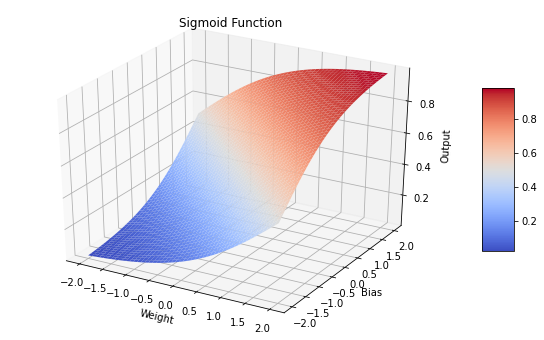

In [20]:
w = torch.linspace(-2,2, 50)
b = torch.linspace(-2,2, 50)

w = torch.tensor(w, requires_grad=True)
b = torch.tensor(b, requires_grad=True)

x = 1

w, b = torch.meshgrid(w,b)
y = w * x + b
a = nn.Sigmoid()
z = a(y)

fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w.detach().numpy(), b.detach().numpy(), z.detach().numpy(), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('Sigmoid Function')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Output')

2. (3%) Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

Text(0.5, 0, 'Loss')

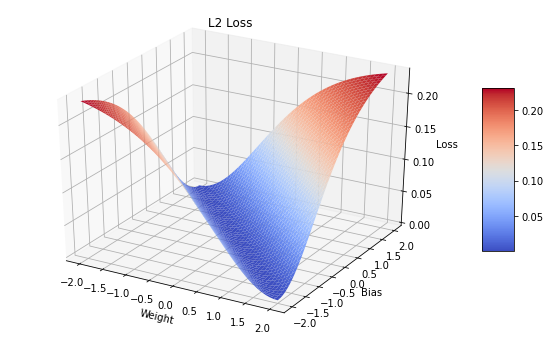

In [21]:
y = 0.5 * torch.ones_like(z)
L2_loss = torch.pow(z-y, 2)
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w.detach().numpy(), b.detach().numpy(), L2_loss.detach().numpy(), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('L2 Loss')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

3. (4%) Experiment with back-propagation with L2 loss. Compute $\frac{\partial \mathcal{L}_{L2}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

Text(0.5, 0, 'Gradient')

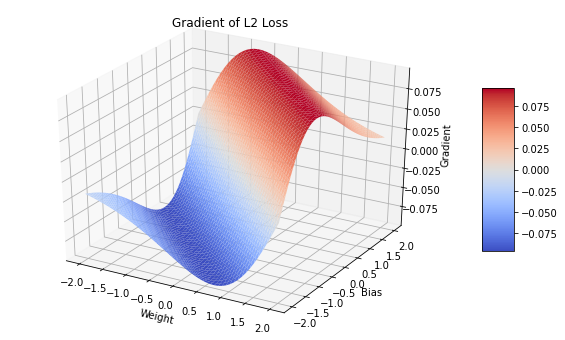

In [22]:
L2_loss_grad = torch.autograd.grad(L2_loss.sum(), w, retain_graph=True)[0]
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w.detach().numpy(), b.detach().numpy(), L2_loss_grad.detach().numpy(), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('Gradient of L2 Loss')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Gradient')

4. (3%) Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

Text(0.5, 0, 'Loss')

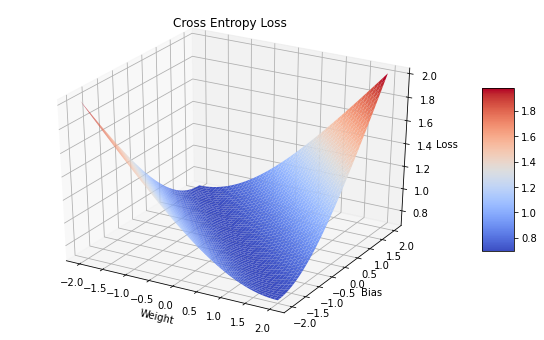

In [23]:
y = 0.5 * torch.ones_like(z)
CE_loss = -(y*torch.log(z)+(1-y)*torch.log(1-z))

fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w.detach().numpy(), b.detach().numpy(), CE_loss.detach().numpy(), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('Cross Entropy Loss')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

5. (4%) Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

Text(0.5, 0, 'Gradient')

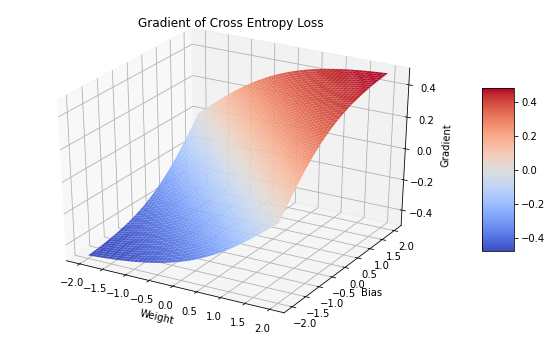

In [24]:
CE_loss_grad = torch.autograd.grad(CE_loss.sum(), w)[0]
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(w.detach().numpy(), b.detach().numpy(), CE_loss_grad.detach().numpy(), cmap=cm.coolwarm)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('Gradient of Cross Entropy Loss')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Gradient')

6. (3%) Explain what you observed from the above 5 plots. The explanation should include: 
 1. What's the difference between cross-entropy loss and L2 loss?
 2. What's the difference between the gradients from cross-entropy loss and L2 loss?
 3. Predict how these differences will influence the efficiency of learning.

1. In Cross Entropy loss, the magnitude is very high as compared to L2 loss. This is expected because CE loss leads to very large error if the predicted value is wrong, which implies it penalises the outliers greatly.
2. The gradient of cross entropy loss is greater than the greadient of L2 loss.
3. The efficiency of learning depends on the loss function besides many other factors because depending on the loss function the outliers are penalised to different extent which leads to better or worse accuracy. Here cross entropy loss is better suited for when we have a classification problem.

## Solving XOR with a 2-layer Perceptron (20%)
In this question you are asked to build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

In the 2 layer perceptron, let $\hat{y}$ be the predicted value and ${y}$ be the ground truth value.
Since it is a binary classification problem, the use of cross entropy loss seems ideal.

 $L$ = $ y \log(\hat{y}) + (1-y)\log(1 - \hat{y}) $

To represent this as an optimization problem, we have to minimize the loss.

 $L_{min}$ = $\text{argmin}_{\hat{y}} \{ y \log(\hat{y}) + (1-y)\log(1-\hat{y}) \} $

2. (10%) Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane. 

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

In [25]:
# Make your dataset here
from torch.autograd import Variable
data = list(map(lambda s: Variable(torch.Tensor([s])), [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]))
labels = list(map(lambda s: Variable(torch.Tensor([s])), [
    [0],
    [1],
    [1],
    [0]]))

In [26]:
# Make your network here
class XOR(torch.nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.linear1 = nn.Sequential(nn.Linear(2, 2), nn.Tanh())
        self.linear2 = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

    def forward(self, x):
        h = self.linear1(x)
        x = self.linear2(h)
        return x, h

network = XOR()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr = 0.03)   

# Train and plot here
for i in range(1000):
  h_list = []
  for datapoint, label in zip(data, labels):
    optimizer.zero_grad()
    y_pred , h = network(datapoint) #(h are the points in the embedding space not the input space. this is what we have to plot)
    h_list.append(h)
    loss = loss_function(y_pred, label)
    loss.backward()
    optimizer.step()

[Parameter containing:
tensor([[ 0.7013, -0.2426],
        [-0.5762, -0.4276]], requires_grad=True), Parameter containing:
tensor([-0.3849, -0.0483], requires_grad=True), Parameter containing:
tensor([[-0.7048, -0.1231]], requires_grad=True), Parameter containing:
tensor([0.1255], requires_grad=True)]


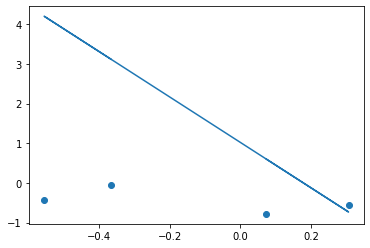

In [27]:
params = list(network.parameters())
print(params)

model_weights = params[2].data.numpy()
model_bias = params[3].data.numpy()

h1 = []
h2 = []
for i in range(len(h_list)):
  arr = h_list[i].detach().numpy()[0]
  h1.append(arr[0])
  h2.append(arr[1])

plt.scatter(h1, h2)

#get decision boundary in embedding space
m = (-model_weights[0][0]/model_weights[0][1])
b = (-model_bias[0]/model_weights[0][1])

y_2 = []
for i in range(len(h1)):
  y2 = h1[i] * m + b
  y_2.append(y2)

plt.plot(h1, y_2)

3. (5%) What will happen if we don't use an activation function in the hidden layer? Is
the network be able to learn the XOR function? Justify your answer.

XOR function is a non linear operation so we need to introduce a non linear activation function like tanh. 
If the activation function is not used then the XOR classification will be incorrect.

## Train a Convolutional Neural Network (30%)
In this part you will be asked to train a convolutional neural network on the MNIST
dataset.

1. (10%) Build a Convolutional Neural Network with architecture as shown below:

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [28]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Create your network here (do not change this name)
class DigitClassification(torch.nn.Module):
    def __init__(self):
        super(DigitClassification, self).__init__()
        #convolution layers
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding="same"),  
                                   nn.BatchNorm2d(32),
                                   nn.ReLU())        
        self.avgpool1 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0) 
        self.conv2 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same"),  
                                   nn.BatchNorm2d(32),
                                   nn.ReLU()) 
        self.avgpool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)      
        self.conv3 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding="same"),  
                                   nn.BatchNorm2d(64),
                                   nn.ReLU()) 
        self.avgpool3 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

        self.linear1 = nn.Sequential(nn.Linear(64*3*3, 64), 
                                     nn.BatchNorm1d(64),
                                     nn.ReLU())
        self.linear2 = nn.Linear(64, 10) #discared softmax as cross entropy loss does it implicitly
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.avgpool1(x)
        x = self.conv2(x)
        x = self.avgpool2(x)
        x = self.conv3(x)
        x = self.avgpool3(x)
        x = self.linear1(x.reshape(x.size(0), -1))
        x = self.linear2(x)
        return x

In [29]:
# Instantiate your network here
model = DigitClassification()
model.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)   

2. (15%) Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam
optimizer).

In [30]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root='.', train=True, download=False, transform=transform)
test_set = torchvision.datasets.MNIST(root='.', train=False, download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = True)

In [31]:
# Where your trained model will be saved (and where the autograder will load it)
model_path = 'model.pth'

train_loss = []
test_loss = []
total_train_acc = []
total_test_acc = []

# Train your network here
num_epochs = 10
for epoch in range(num_epochs):
  total_train_loss = 0
  total_test_loss = 0

  #training the model
  total = 0
  model.train()
  for idx, (image, label) in enumerate(train_loader):
    image, label = image.to(device), label.to(device)

    optimizer.zero_grad()

    y_hat = model(image)

    loss = loss_func(y_hat, label)
    total_train_loss += loss.item()

    loss.backward()
    optimizer.step()

    y_hat = torch.nn.functional.softmax(y_hat, dim=1)

    for i, p in enumerate(y_hat):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

  train_acc = total/len(train_set)
  total_train_acc.append(train_acc)

  total_train_loss = total_train_loss/(idx + 1)
  train_loss.append(total_train_loss)

  #validating the model
  total = 0
  model.eval()
  for idx, (image, label) in enumerate(test_loader):
    image, label = image.cuda(), label.cuda()

    y_hat = model(image)
    loss = loss_func(y_hat, label)

    total_test_loss += loss.item()

    y_hat = torch.nn.functional.softmax(y_hat, dim=1)

    for i, p in enumerate(y_hat):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

  test_acc = total/len(test_set)
  total_test_acc.append(test_acc)

  total_test_loss = total_test_loss/(idx + 1)
  test_loss.append(total_test_loss)

  print("Epoch %d/%d" % (epoch+1, num_epochs))
  print(test_acc)

torch.save(model.state_dict(), model_path)

Epoch 1/10
0.9892
Epoch 2/10
0.9861
Epoch 3/10
0.9902
Epoch 4/10
0.9888
Epoch 5/10
0.9914
Epoch 6/10
0.9927
Epoch 7/10
0.9888
Epoch 8/10
0.9937
Epoch 9/10
0.9933
Epoch 10/10
0.9919


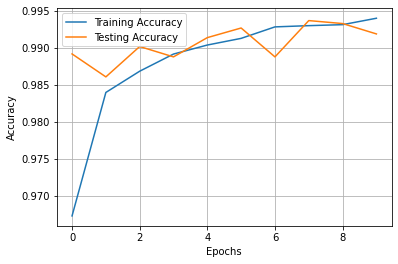

In [32]:
plt.plot(total_train_acc, label='Training Accuracy')
plt.plot(total_test_acc, label='Testing Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

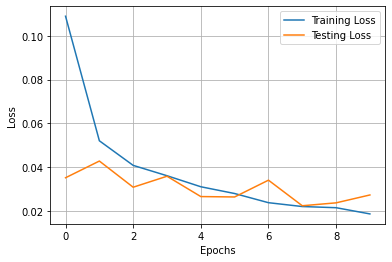

In [33]:
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

In [34]:
torch.save(model.cpu().state_dict(), model_path)

3. (5%) Report the training and testing curves and briefly summarise your implementation and training. Some things you may considering discussing, if appropriate:
 * Summarize your selection of hyperparameters.
 * Describe any issues or challenges you had with your implementation.
 * Note any interesting observations you made. 
 * Justify any modifications or additions to the suggested architecture.
 * Do you think that the model overfit, underfit, or neither?
 
 You do not need to include all of these points and are free to discuss anything else you deem relevant.

 

*  The hyperparameters for the architecture were chosen as was suggested in the instructions. For the optimizer, I chose the Adam optimizer with a learning rate of 0.01. I also chose the batch size to be 32.
*   The main challenge I faced with the implementation was only on how we should access the MNIST data using torchvision and dataloader. Other than that the implementation was quite straightforward.
*   The one interesting observation was the use of padding="same". The other interesting thing to note was how cross entropy loss implicitly executes softmax function.
*   One suggestion would be to use LeakyReLU instead of ReLU as an activation function. A grid search can also be implemented to find the optimal hyperparameters.
*   I think the model (slightly) overfit. Overfitting can be avoided by adding dropout layers or by changing up the hyperparameters.








## Submission

Make sure you have run all cells in your notebook in order before you zip together your submission, so that all images/graphs appear in the output. 

Your submission should include two files: this notebook and your trained model weights.

**Please save before exporting!**